<h1 style="background-color:lightblue;padding:2rem;border-radius:5px;">Chunk regressions</h1>

<h2 style="background-color:lightblue;padding:2rem;border-radius:5px;">Create the data</h2>

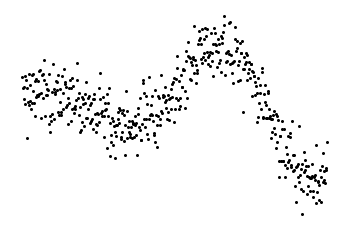

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


def f(x):
    return x*np.cos(x) + np.random.normal(size=500)*2


x = np.linspace(0, 10, 500)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:])
y = f(x)

plt.plot(x, y, 'o', color='black', markersize=2)
plt.axis('off')
plt.show()


<h2 style="background-color:lightblue;padding:2rem;border-radius:5px;">Regression on all data</h2>

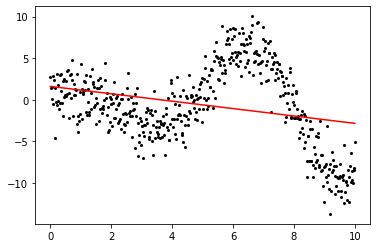

Regression score : 0.07


In [7]:
xok = x.reshape(500, 1)
xok.shape
regr = linear_model.LinearRegression()
regr.fit(xok, y)

plt.plot(xok, y, 'o', color='black', markersize=2)
plt.plot(xok, regr.predict(xok), '-', color='red')
plt.axis('on')
plt.show()

print(f"Regression score : {regr.score(xok,y):.2f}")


<h2 style="background-color:lightblue;padding:2rem;border-radius:5px;">Chunk regressions</h2>
<p>As there are movements in some parts, several regressions could also be made.</p>

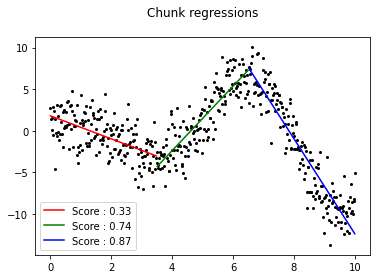

In [26]:
filtre1 = xok < 3.5
filtre2 = (xok >= 3.5) & (xok < 6.5)
filtre3 = xok >= 6.5


x1 = xok[filtre1].reshape(-1, 1)
y1 = y[filtre1.ravel()]

x2 = xok[filtre2].reshape(-1, 1)
y2 = y[filtre2.ravel()]

x3 = xok[filtre3].reshape(-1, 1)
y3 = y[filtre3.ravel()]

plt.plot(xok, y, 'o', color='black', markersize=2)

couleurs = ['red', 'green', 'blue']

for i in range(3):
    regr = linear_model.LinearRegression()
    varx = eval("x" + str(i+1))
    vary = eval("y" + str(i+1))
    regr.fit(varx, vary)
    plt.plot(varx, regr.predict(varx), '-', color=couleurs[i], label=f"Score : {regr.score(varx,vary):.2f}")


plt.legend(loc="lower left")
plt.title("Chunk regressions\n")
plt.axis('on')
plt.show()
